In [7]:
from my_metrics import *
from sub_network import *
from data_loader import *
from plotting_utils import *

import tensorflow as tf
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

import pickle

import matplotlib.pyplot as plt

In [8]:
image_dir1 = r"D:\snn_mask\snn_training_IEEE_mask\ours(560)\s1_ieee"
image_dir2 = r"D:\snn_mask\snn_training_IEEE_mask\ours(560)\s2_ieee"

images1 = load_images(image_dir1)
images2 = load_images(image_dir2)

pairs, labels = create_labels(images1, images2)

0 243
1 244
2 166
3 198
4 240
5 136
6 274
7 195
8 23
9 171
10 207
11 276
12 163
13 46
14 271
15 188
16 132
17 157
18 95
19 160
20 118
21 182
22 93
23 121
24 85
25 272
26 205
27 15
28 278
29 224
30 203
31 62
32 51
33 251
34 155
35 262
36 244
37 79
38 111
39 98
40 51
41 255
42 195
43 160
44 132
45 162
46 86
47 163
48 126
49 122
50 170
51 73
52 117
53 189
54 7
55 130
56 217
57 91
58 147
59 266
60 44
61 174
62 121
63 30
64 236
65 18
66 207
67 204
68 104
69 196
70 158
71 133
72 145
73 239
74 193
75 248
76 211
77 4
78 129
79 178
80 42
81 31
82 191
83 51
84 109
85 233
86 186
87 145
88 276
89 179
90 155
91 237
92 146
93 118
94 175
95 40
96 173
97 239
98 48
99 227
100 37
101 168
102 128
103 176
104 120
105 17
106 214
107 192
108 87
109 178
110 2
111 61
112 55
113 21
114 33
115 95
116 228
117 5
118 176
119 261
120 20
121 231
122 239
123 23
124 89
125 29
126 48
127 211
128 42
129 47
130 204
131 105
132 84
133 103
134 89
135 189
136 251
137 213
138 251
139 15
140 205
141 171
142 258
143 165
144 20

In [9]:
train_pairs, test_pairs, train_labels, test_labels = train_test_split(pairs, labels, test_size=0.2, random_state=42)
print("train_pairs.shape={}".format(train_pairs.shape))
print("test_pairs.shape={}".format(test_pairs.shape))
print("train_labels.shape={}".format(train_labels.shape))
print("test_labels.shape={}".format(test_labels.shape))

trainPairs_0 = np.array([pair[0] for pair in train_pairs]).reshape(-1, 256, 256, 1)
trainPairs_1 = np.array([pair[1] for pair in train_pairs]).reshape(-1, 256, 256, 1)
testPairs_0 = np.array([pair[0] for pair in test_pairs]).reshape(-1, 256, 256, 1)
testPairs_1 = np.array([pair[1] for pair in test_pairs]).reshape(-1, 256, 256, 1)

train_pairs.shape=(448, 2, 256, 256)
test_pairs.shape=(112, 2, 256, 256)
train_labels.shape=(448,)
test_labels.shape=(112,)


In [10]:
#主網路架構

inputShape = (256, 256, 1)

inputA = Input(inputShape)
inputB = Input(inputShape)

featureExtractor = sub_network(inputShape)

featsA = featureExtractor(inputA)
featsB = featureExtractor(inputB)

distance = EuclideanDistance()([featsA, featsB])

outputs = Dense(1, activation="sigmoid")(distance)

model = Model(inputs=[inputA, inputB], outputs=outputs)

model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 256, 256, 1)]     0         
                                                                 
 conv2d_2 (Conv2D)           (None, 254, 254, 32)      320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 127, 127, 32)      0         
                                                                 
 conv2d_3 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                       

In [11]:
model.compile(loss=contrastive_loss, optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy", precision, recall, f1_score]) 

model_checkpoint = ModelCheckpoint("snn.hdf5", monitor="val_loss", verbose=1, save_best_only=True)

history = model.fit(
    [trainPairs_0, trainPairs_1], train_labels,
    validation_data=([testPairs_0, testPairs_1], test_labels),
    batch_size=16, 
    epochs=150,
    callbacks=[model_checkpoint])

with open("trainHistory.txt", "wb") as file_pi:
    pickle.dump(history.history, file_pi)

Epoch 1/150
28/28 [==============================] - ETA: 0s - loss: 0.3022 - accuracy: 0.5134 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_score: 0.0000e+00
Epoch 1: val_loss improved from inf to 0.24054, saving model to snn.hdf5
28/28 [==============================] - 3s 73ms/step - loss: 0.3022 - accuracy: 0.5134 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_score: 0.0000e+00 - val_loss: 0.2405 - val_accuracy: 0.4554 - val_precision: 0.1429 - val_recall: 0.0179 - val_f1_score: 0.0317
Epoch 2/150
27/28 [===========================>..] - ETA: 0s - loss: 0.2188 - accuracy: 0.5116 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_score: 0.0000e+00
Epoch 2: val_loss improved from 0.24054 to 0.21378, saving model to snn.hdf5
28/28 [==============================] - 2s 64ms/step - loss: 0.2178 - accuracy: 0.5134 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_score: 0.0000e+00 - val_loss: 0.2138 - val_accuracy: 0.4464 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f

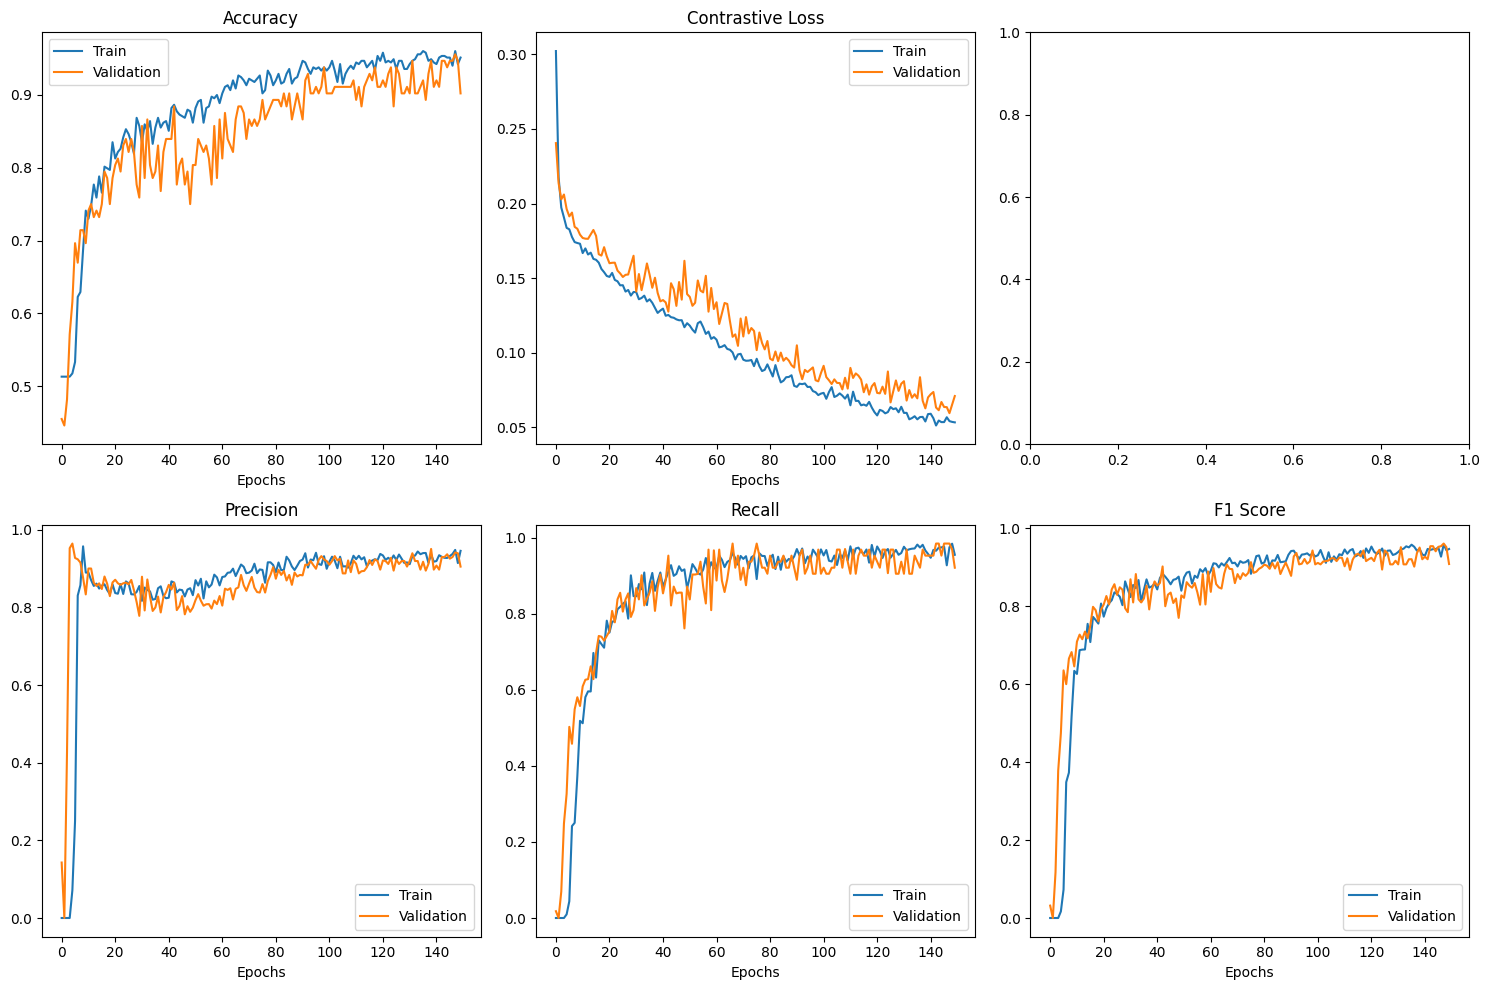

In [12]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

axs[0, 0].plot(history.history["accuracy"], label="Train")
axs[0, 0].plot(history.history["val_accuracy"], label="Validation")
axs[0, 0].set_title("Accuracy")
axs[0, 0].set_xlabel("Epochs")
axs[0, 0].legend()

axs[0, 1].plot(history.history["loss"], label="Train")
axs[0, 1].plot(history.history["val_loss"], label="Validation")
axs[0, 1].set_title("Contrastive Loss")
axs[0, 1].set_xlabel("Epochs")
axs[0, 1].legend()


axs[1, 0].plot(history.history["precision"], label="Train")
axs[1, 0].plot(history.history["val_precision"], label="Validation")
axs[1, 0].set_title("Precision")
axs[1, 0].set_xlabel("Epochs")
axs[1, 0].legend()

axs[1, 1].plot(history.history["recall"], label="Train")
axs[1, 1].plot(history.history["val_recall"], label="Validation")
axs[1, 1].set_title("Recall")
axs[1, 1].set_xlabel("Epochs")
axs[1, 1].legend()

axs[1, 2].plot(history.history["f1_score"], label="Train")
axs[1, 2].plot(history.history["val_f1_score"], label="Validation")
axs[1, 2].set_title("F1 Score")
axs[1, 2].set_xlabel("Epochs")
axs[1, 2].legend()

plt.tight_layout()
plt.show()